In [2]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [3]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import pickle
import pandas as pd
import random

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, ZeroPadding2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
fileObject1 = open('german-traffic-signs/train.p','rb')
train_data = pickle.load(fileObject1)
fileObject2 = open('german-traffic-signs/valid.p','rb')
val_data = pickle.load(fileObject2)
fileObject3 = open('german-traffic-signs/test.p','rb')
test_data = pickle.load(fileObject3)

In [0]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [0]:
data = pd.read_csv("german-traffic-signs/signnames.csv")

In [10]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
def preprocessing(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  image = cv2.equalizeHist(image)
  image = image/255
  return image

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

In [13]:
X_train.shape

(34799, 32, 32)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
generator = ImageDataGenerator(height_shift_range=0.2,
                  width_shift_range=0.2,
                  zoom_range = 0.3,
                  shear_range = 0.1,
                  rotation_range=5)


In [0]:
generator.fit(X_train)

In [0]:
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

In [0]:
def model():
  model = Sequential()
  model.add(ZeroPadding2D((1,1),input_shape=(32,32,1)))
  model.add(Conv2D(64, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(64, 3, 3, activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(128, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(128, 3, 3, activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(256, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(256, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(256, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(256, 3, 3, activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(ZeroPadding2D((1,1)))
  model.add(Conv2D(512, 3, 3, activation='relu'))
  model.add(MaxPooling2D((2,2), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation='softmax'))

  optimizer = Adam(lr=0.0001)

  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])
  return model

In [19]:
model = model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [20]:
h = model.fit_generator(generator.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs =10, validation_data=(X_val,y_val), shuffle=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
2000/2000 [==============================] - 327s 164ms/step - loss: 2.4302 - acc: 0.2329 - val_loss: 1.3492 - val_acc: 0.5188
Epoch 2/10
2000/2000 [==============================] - 319s 159ms/step - loss: 0.7569 - acc: 0.7422 - val_loss: 0.3192 - val_acc: 0.8955
Epoch 3/10
2000/2000 [==============================] - 320s 160ms/step - loss: 0.2968 - acc: 0.9029 - val_loss: 0.2494 - val_acc: 0.9231
Epoch 4/10
2000/2000 [==============================] - 320s 160ms/step - loss: 0.1741 - acc: 0.9456 - val_loss: 0.1041 - val_acc: 0.9707
Epoch 5/10
2000/2000 [==============================] - 320s 160ms/step - loss: 0.1146 - acc: 0.9672 - val_loss: 0.0703 - val_acc: 0.9753
Epoch 6/10
2000/2000 [==============================] - 319s 160ms/step - loss: 0.0935 - acc: 0.9752 - val_loss: 0.0592 - val_acc: 0.9853
Epoch 7/10
2000/2000 [==============================] - 320s 160ms/step - loss: 0.0708 - acc: 0.9814 - val_loss: 0.0769 - va

Text(0.5, 0, 'epochs')

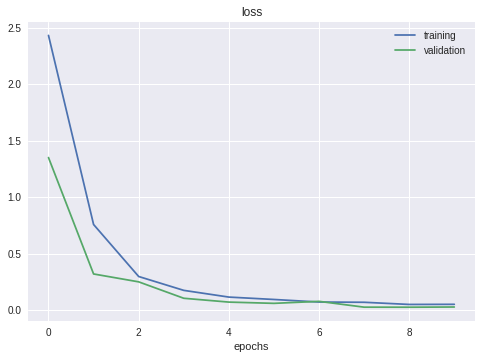

In [21]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

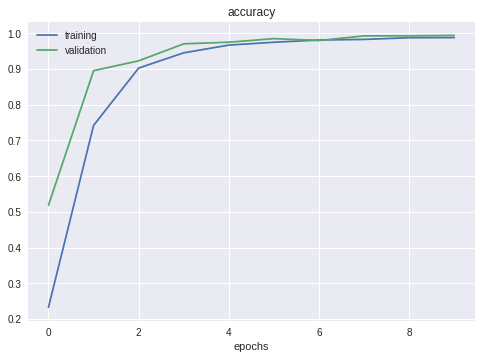

In [22]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('epochs')

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.15249356481893986
Test accuracy:  0.9719714964842475


(-0.5, 1299.5, 945.5, -0.5)

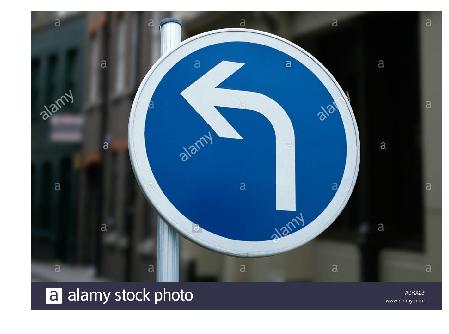

In [40]:
#fetch image
 
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")

(32, 32)


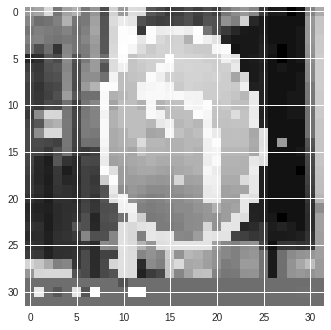

In [41]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 


In [0]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)

In [43]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [34]


In [45]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 18.2MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model.save('model.h5')    
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()